# **Proyek Predictive Analytics: [Crop Recommendation Dataset]**

- **Nama** : Satria Dirgantara Nuryaman
- **Email** : satriadirgantaranuryaman15@gmail.com
- **ID Dicoding** : Satria Dirgantara Nuryaman 

## **Import Library**

In [1]:
# Data Manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px

# Data Processing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA

# Model Machine Learning
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

# Model Evaluation
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Model Tuning
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# Warnings
import warnings 

# Configureations
warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8-whitegrid')

## **Data Loading**

In [2]:
FILE_PATH = 'data/Crop_recommendation.csv'
df = pd.read_csv(FILE_PATH)
display(df.head(), df.tail())

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


,N,P,K,temperature,humidity,ph,rainfall,label
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee
2199,104,18,30,23.603016,60.396475,6.779833,140.937041,coffee


Dataset Crop Recommendation ini memiliki:
- 2200 baris.
- 8 fitur yang bernama **N (Nitrogen)**, **P (Phosphorous)**, **K (Potassium)**, **temperature**, **humidity**, **ph**, **rainfall**, dan **label**. 


## **Exploratory Data Analysis (EDA)**

### **Deskripsi Variable Dataset**


| Fitur        | Deskripsi                                      |
|--------------|------------------------------------------------|
| N            | Rasio kandungan Nitrogen dalam tanah           |
| P            | Rasio kandungan Phosphorous dalam tanah        |
| K            | Rasio kandungan Potassium dalam tanah          |
| temperature  | Suhu lingkungan (°C)                           |
| humidity     | Kelembapan relatif (%)                         |
| ph           | Nilai pH tanah                                 |
| rainfall     | Curah hujan (mm)                               |
| label        | Jenis tanaman yang direkomendasikan (target)   |

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


Seperti yang sudah di jelaskan dataset ini memiliki 2200 baris yang terdiri dari 8 Fitur yang berbeda beda tipe datanya:

- **temperature**, **humidity**, **ph**, dan **rainfall** bertipe data float64.
- **N (Nitrogen)**, **P (Phosphorous)**, dan **K (Potassium)** bertipe data float64.
- **label** bertipe data object.

Bisa kita lihat juga ternyata tidak ada missing values di dataset kita ini, inkonsistensi data juga tidak ada, semuanya sudah clean, tapi kita harus memastikan nya lagi.

In [4]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


Berdasarkan analisis deskriptif terhadap 2.200 sampel, ditemukan bahwa fitur fitur lingkungan dan tanah memiliki sebaran nilai yang cukup luas. 

- Unsur hara tanah seperti **nitrogen (N: 0 – 140 ppm)**, **fosfor (P: 5 – 145 ppm)**, dan **potassium (K: 5 – 205 ppm)** menunjukkan variasi yang signifikan, menandakan perbedaan kondisi tanah yang cukup ekstrem antar wilayah. 
- Kandungan kalium secara khusus dan ajaib memiliki standar deviasi tertinggi (**50.6**), menunjukkan keragaman yang besar dan kemungkinan peran pentingnya dalam penentuan jenis tanaman yang sesuai.
- Rata rata suhu sebesar **25.6 C** dengan rentang **8.8** – **43.7 C**, serta kelembapan **71.5%** (**14.3 – 99.9%**), mengindikasikan bahwa dataset ini mencakup berbagai kondisi iklim. pH tanah umumnya netral hingga sedikit asam/basa (rata rata **6.47**), dan curah hujan berkisar antara **20.2** – **298.6** mm, mendukung analisis untuk berbagai jenis tanaman yang tumbuh di lingkungan berbeda.

Dengan kondisi lingkungan yang seberagam ini, penting untuk tahu fitur mana saja yang benar benar berpengaruh terhadap pilihan tanaman. Ini bukan cuma penting untuk akurasi model, tapi juga bisa jadi pegangan nyata bagi petani dalam mengelola lahannya dengan lebih tepat.

### **Identifikasi Missing Values**

In [5]:
missing_values = df.isnull().sum()
missing_values_percentage = (missing_values / len(df)) * 100

missing_df = pd.DataFrame({
    'Missing Values' : missing_values,
    'Percentage' : missing_values_percentage
}) 

display(missing_df[missing_df['Missing Values'] > 0])

,Missing Values,Percentage


Ternyata benar informasi kita diatas, tidak ada nya missing values disini.

### **Mengecek Duplicated Data**

In [6]:
print(f'Jumlah data yang terduplikasi adalah {df.duplicated().sum()}')

Jumlah data yang terduplikasi adalah 0


Ternyata dataset Crop Recommendation sudah bersih, di buktikan dengan ketidakadaan nilai yang NaN dan juga duplikasi.

### **Identifikasi Outliers**

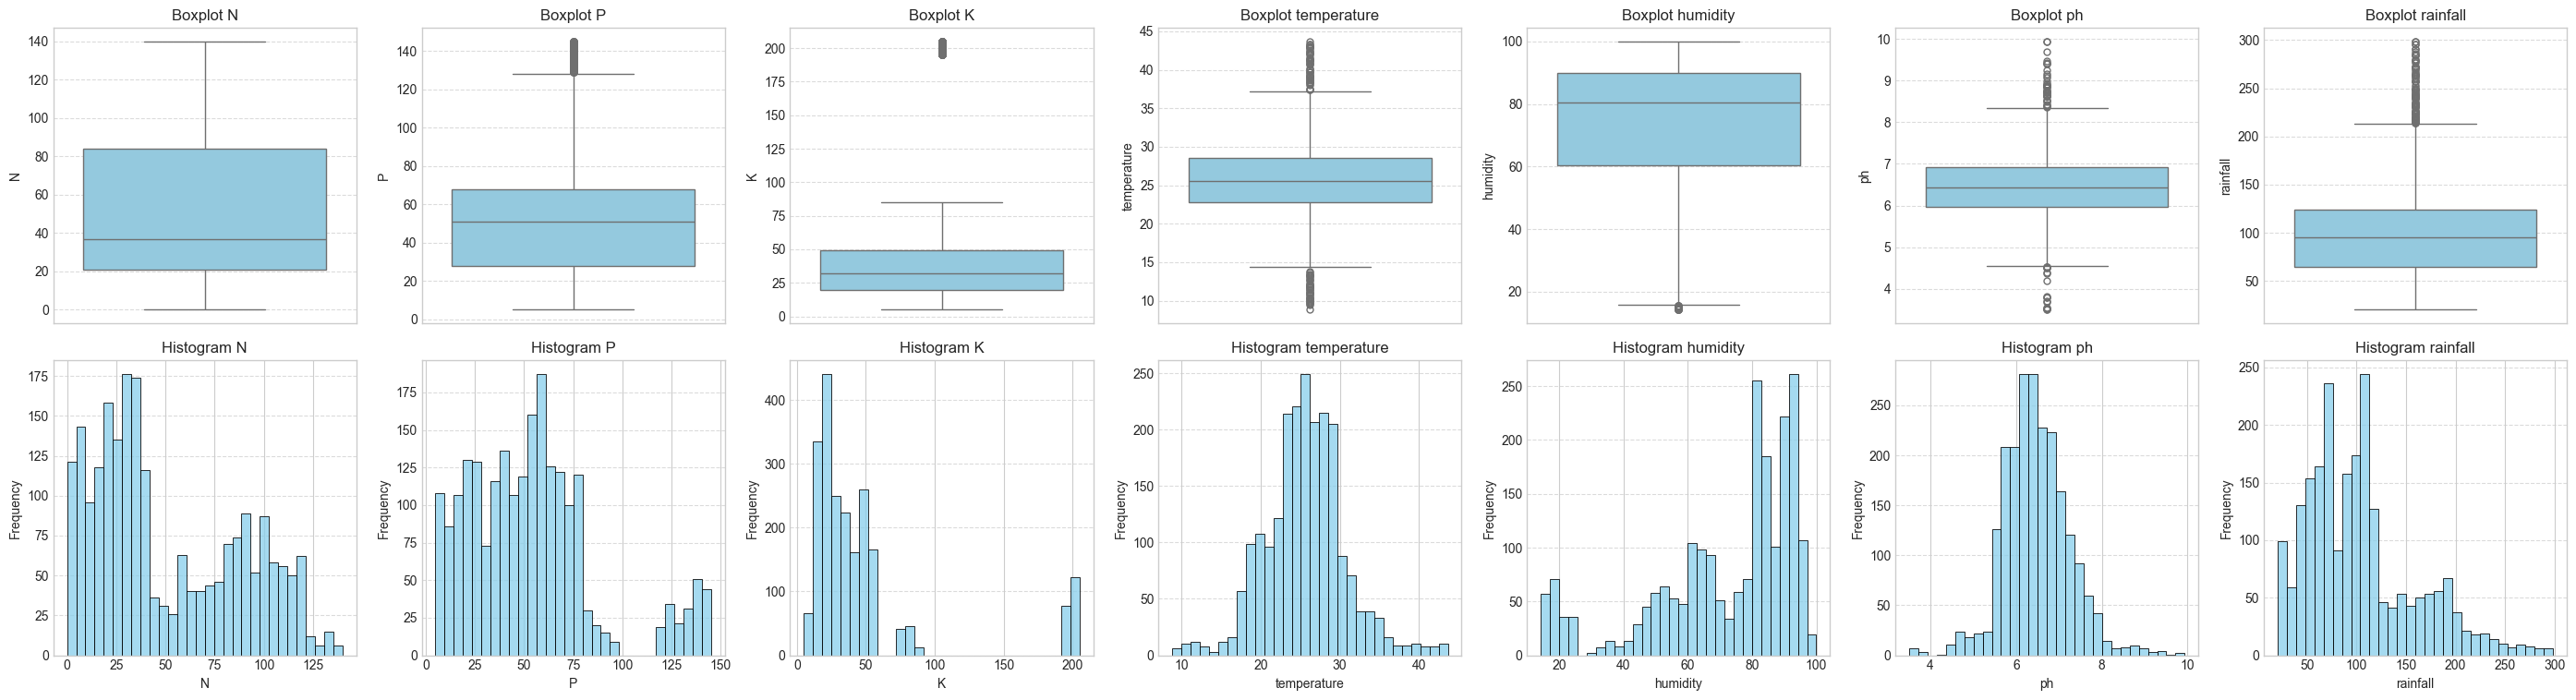

++++++++ Jumlah outlier pada setiap fitur ++++++++
N: 0 outliers detected
P: 138 outliers detected
K: 200 outliers detected
temperature: 86 outliers detected
humidity: 30 outliers detected
ph: 57 outliers detected
rainfall: 100 outliers detected


In [ ]:
num_features = df.select_dtypes(include=[np.number]).columns.tolist()
fig, ax = plt.subplots(2, len(num_features), figsize=(4 * len(num_features), 8))
ax = ax.flatten()

for i, feature in enumerate(num_features):
    # Boxplot dengan seaborn
    sns.boxplot(y=df[feature], ax=ax[0, i], color='skyblue', fliersize=5)
    ax[0, i].set_title(f'Boxplot {feature}')
    ax[0, i].set_ylabel(feature)
    ax[0, i].grid(True, axis='y', linestyle='--', alpha=0.7)

    # Histogram dengan seaborn
    sns.histplot(df[feature], bins=30, ax=ax[1, i], color='skyblue', edgecolor='black')
    ax[1, i].set_title(f'Histogram {feature}')
    ax[1, i].set_xlabel(feature)
    ax[1, i].set_ylabel('Frequency')
    ax[1, i].grid(True, axis='y', linestyle='--', alpha=0.7)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


# Outlier summary
print(' Jumlah outlier pada setiap fitur '.center(50 , '+'))
outlier_summary = []
for feature in num_features:
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)]
    outlier_summary.extend(outliers)

    print(f'{feature}: {len(outliers)} outliers detected')


Visualisasi boxplot memperlihatkan banyak outlier pada fitur seperti **P (Phosphorous)**, **K (Potassium)**, **temperature**, **ph**, dan **rainfall**. Namun, ketika kita lihat bersama dengan visualisasi histogramnya, kita mendapatkan gambaran yang lebih utuh tentang sifat distribusinya.

- **P** dan **K** memang memiliki outlier di ujung atas, tapi histogram **P (Fosfor)** menunjukkan distribusi yang agak miring ke kanan (**right-skewed**) dan histogram **K (Potassium)** sama seperti **P** tapi terlihat lebih parah yang sangat (**right-skewed**). Kalau positifnya, nilai nilai tinggi itu bukan anomali acak bisa jadi mewakili kelompok wilayah yang secara alami memiliki kandungan hara tinggi dan sangat cocok dijadikan lahan pertanian.

- **temperature** dan **ph** tampak hampir normal di histogram, tapi tetap punya outlier di boxplot. Ini mengindikasikan beberapa kondisi ekstrem yang jarang tapi masih terstruktur, seperti daerah dataran tinggi atau sangat basa/asam.

- **rainfall** punya outlier yang cukup banyak, dan histogramnya mendukung distribusinya jelas skewed ke kanan. Ini menunjukkan beberapa wilayah memang memiliki curah hujan jauh di atas rata rata dan ini bukan kesalahan data, tapi refleksi dari kondisi dunia nyata.

- **nitrogen** dan **humidity** menunjukkan distribusi yang relatif merata tanpa bentuk aneh dan outlier pun hampir tidak ada bisa dianggap sebagai fitur yang paling stabil.



### **Univariate Analysis**

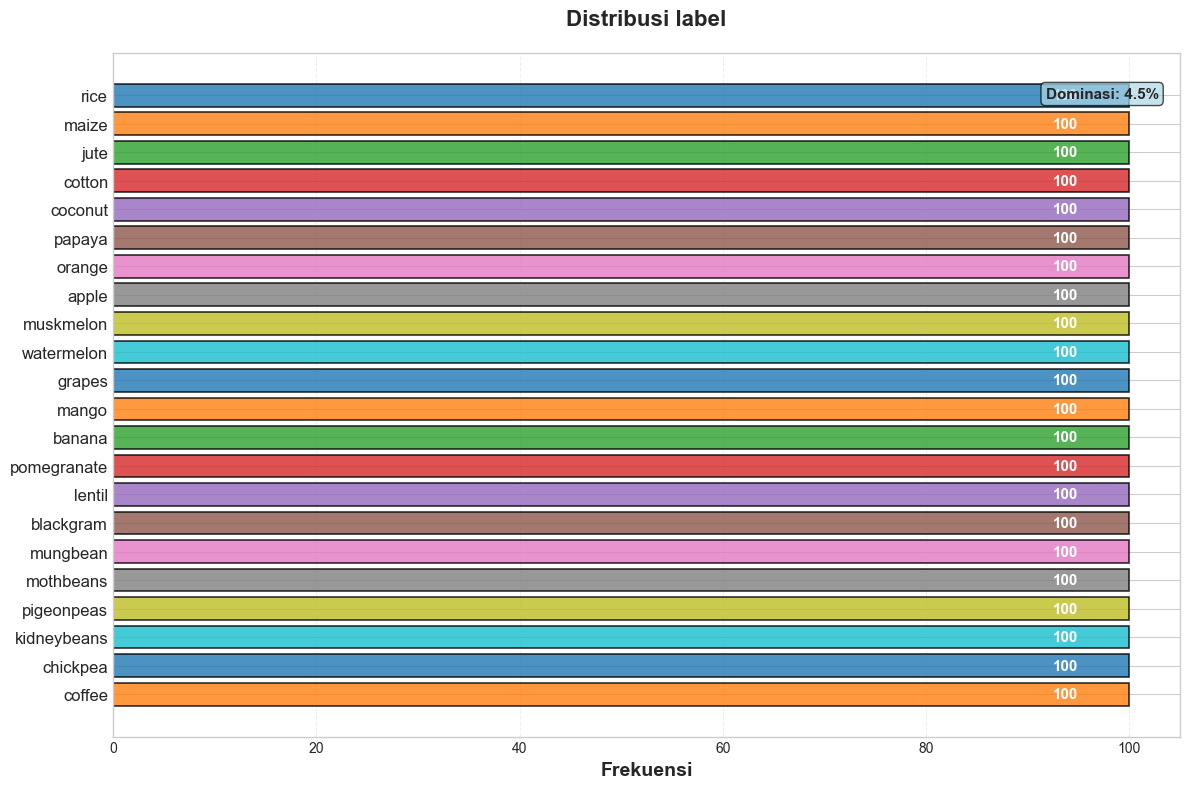

Summary Label Unique:
- Total kategori: 22
- Kategori dominan: rice (100 sampel - 4.5%)


In [ ]:
# Visualisasi distribusi fitur kategorikal
col = df.select_dtypes(include=['object']).columns[0]
plot_data = df[col].value_counts()

# Warna untuk setiap nilai unik
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', 
          '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

# Setup figure dan axis
fig, ax = plt.subplots(figsize=(12, 8))

# Horizontal bar chart
bars = ax.barh(
    plot_data.index,
    plot_data.values,
    color=colors[:len(plot_data)],
    edgecolor='black',
    linewidth=1.2,
    alpha=0.8
)

# Kustomisasi plot
ax.set_xlabel('Frekuensi', fontsize=14, fontweight='600')
ax.set_title(f'Distribusi {col}', fontsize=16, fontweight='bold', pad=20)
ax.set_yticklabels(plot_data.index, fontsize=12)
ax.invert_yaxis()
ax.grid(True, linestyle='--', alpha=0.3, axis='x')
ax.set_axisbelow(True)

# Tambahkan annotasi nilai pada setiap bar
max_value = max(plot_data.values)
for bar, value in zip(bars, plot_data.values):
    width = bar.get_width()
    
    # Tentukan posisi dan style text berdasarkan lebar bar
    if width > max_value * 0.1:
        x_pos = width - (width * 0.05)
        ha, color_text, weight = 'right', 'white', 'bold'
    else:
        x_pos = width + (max_value * 0.01)
        ha, color_text, weight = 'left', 'black', 'normal'
    
    # Tambahkan text annotation
    ax.text(x_pos, bar.get_y() + bar.get_height()/2,
            f'{int(value):,}',
            ha=ha, va='center',
            fontsize=11, fontweight=weight, color=color_text)

# Tambahkan info dominasi kategori
top_pct = (plot_data.iloc[0] / len(df)) * 100
ax.text(0.98, 0.95, f'Dominasi: {top_pct:.1f}%',
        transform=ax.transAxes,
        ha='right', va='top',
        bbox=dict(boxstyle='round,pad=0.3', facecolor='lightblue', alpha=0.7),
        fontsize=11, fontweight='bold')

plt.tight_layout()
plt.show()

# Print summary insights
print('Summary Label Unique:')
print(f'- Total kategori: {plot_data.shape[0]}')
print(f'- Kategori dominan: {plot_data.index[0]} ({plot_data.iloc[0]:,} sampel - {top_pct:.1f}%)')

Jika kita lihat dari visualisasi distribusi fitur kategorikal di atas dan juga ringkasan datanya, kita menemukan bahwa:

- **Label** terdiri dari **22 kategori komoditas pertanian** yang berbeda beda. Yang menarik adalah jumlah sampel dari setiap kategori sangat merata secara sempurna, dibuktikan dengan visualisasi yang menunjukkan masing masing kelas memiliki 100 sampel. Meskipun rice terlihat paling dominan, kontribusinya hanya 4.5% dari total data jadi tetap seimbang.

- Distribusi yang seimbang inilah yang menjadi pondasi ideal bagi model klasifikasi. Karena tidak ada ketimpangan antar kelas, maka tidak terjadi masalah imbalance data, sehingga model tidak cenderung bias ke satu kelas saja. Hal ini juga membuat metrik seperti akurasi menjadi lebih adil dan representatif, karena semua kelas diberi perlakuan yang setara.

### **Multivariate Analysis**

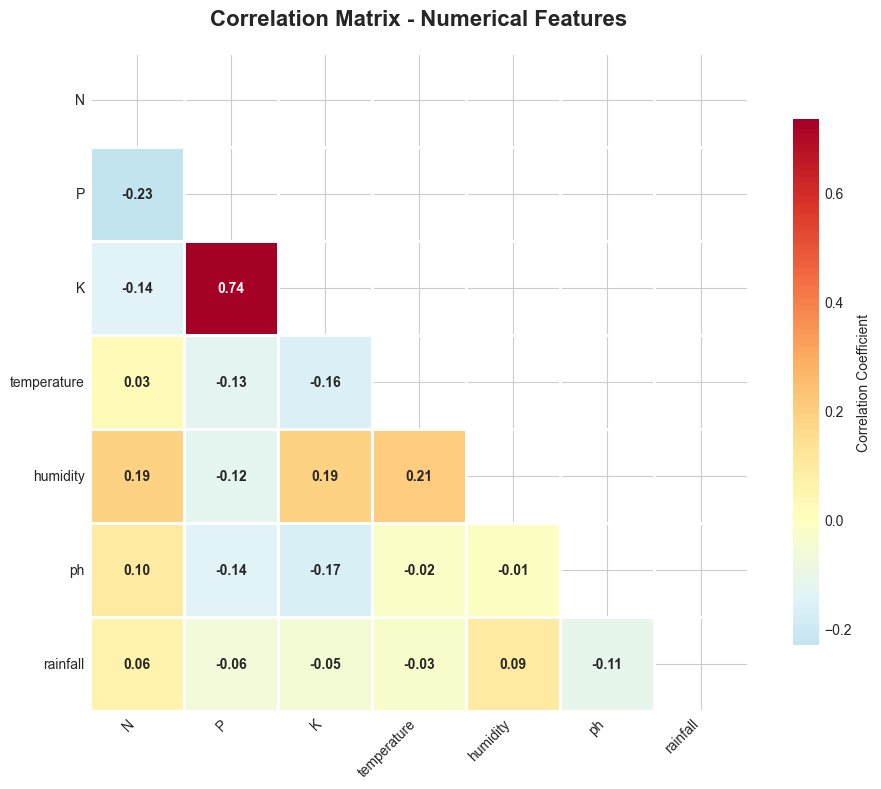

               CORRELATION INSIGHTS               

Significant Correlations (>= 0.3):
---------------------------------------------
           P <-> K            :  0.736 (Strong)

Summary:
- Total Fitur Yang Di Analisis: 21
- Korelasi Yang Signifikan Di Temukan: 1


In [41]:
# Correlation Heatmap dengan styling baru
plt.figure(figsize=(10, 8))
corr_matrix = df[num_features].corr()

# Mask untuk menampilkan hanya bagian bawah segitiga
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Heatmap dengan colormap yang fresh
sns.heatmap(
    corr_matrix, 
    mask=mask,
    annot=True, 
    fmt='.2f',
    cmap='RdYlBu_r',
    center=0,
    square=True, 
    linewidths=1,
    cbar_kws={
        'shrink': 0.8, 
        'label': 'Correlation Coefficient'
    },
    annot_kws={
        'fontsize': 10, 
        'fontweight': 'bold'
    }
)

# Clean styling
plt.title('Correlation Matrix - Numerical Features', 
          fontsize=16, fontweight='bold', pad=20)
plt.xlabel('')
plt.ylabel('')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

plt.tight_layout()
plt.show()

# Enhanced insight analysis
print('=' * 50)
print('CORRELATION INSIGHTS'.center(50))
print('=' * 50)

# Cari korelasi dengan threshold yang lebih detail
threshold = 0.3
correlations = []

for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        corr_val = corr_matrix.iloc[i, j]
        if abs(corr_val) >= threshold:
            correlations.append({
                'feature1': corr_matrix.columns[i],
                'feature2': corr_matrix.columns[j], 
                'correlation': corr_val,
                'strength': 'Strong' if abs(corr_val) >= 0.7 else 'Moderate'
            })

if correlations:
    print(f'\nSignificant Correlations (>= {threshold}):')
    print('-' * 45)
    for item in sorted(correlations, key=lambda x: abs(x["correlation"]), reverse=True):
        print(f'{item["feature1"]:>12} <-> {item["feature2"]:<12} : {item["correlation"]:6.3f} ({item["strength"]})')
else:
    print(f'\Tidak Ada Korelasi Yang Signifikan (threshold: {threshold})')

print(f'\nSummary:')
print(f'- Total Fitur Yang Di Analisis: {len(corr_matrix.columns) * (len(corr_matrix.columns) - 1) // 2}')
print(f'- Korelasi Yang Signifikan Di Temukan: {len(correlations)}')

Di Visualisasi Korelasi di atas kita menmukan bahwa:
- Satu satunya korelasi signifikan yang terdeteksi adalah antara **Phosphorus (P)** dan **Potassium (K)**, dengan nilai sebesar **0.74**. Ini menunjukkan hubungan yang **kuat dan positif**, artinya saat kandungan P meningkat, K juga cenderung meningkat. Nah ini dapat dijelaskan secara kontekstual dalam dunia pertanian karena **P dan K adalah dua unsur hara makro yang umum diaplikasikan secara bersamaan dalam pupuk NPK** (Nitrogen Phosphorus Potassium). Oleh karena itu, tidak mengherankan jika kandungan keduanya saling berkorelasi secara alami dalam tanah yang diberi perlakuan pupuk serupa.

- Dari sisi analisis data, korelasi kuat ini berpotensi menyebabkan **redundansi fitur** saat digunakan sebagai input model prediktif. Jika tidak ditangani, model bisa memberi bobot berlebih pada dua fitur yang menyampaikan informasi serupa. Oleh karena itu, pada tahap preprocessing atau modeling, perlu dipertimbangkan teknik seperti:
    - **Feature selection** untuk memilih salah satu di antaranya.
    - **Regularisasi** untuk mengurangi dampak multikolinearitas.
    - **PCA** jika ingin mereduksi dimensi namun tetap mempertahankan informasi dominan.

Secara keseluruhan, korelasi ini menjadi sinyal penting bahwa **hubungan antar unsur dalam tanah bisa bersifat sistemik**, dan pemodelan harus memperhitungkan faktor faktor agronomis di balik angka.

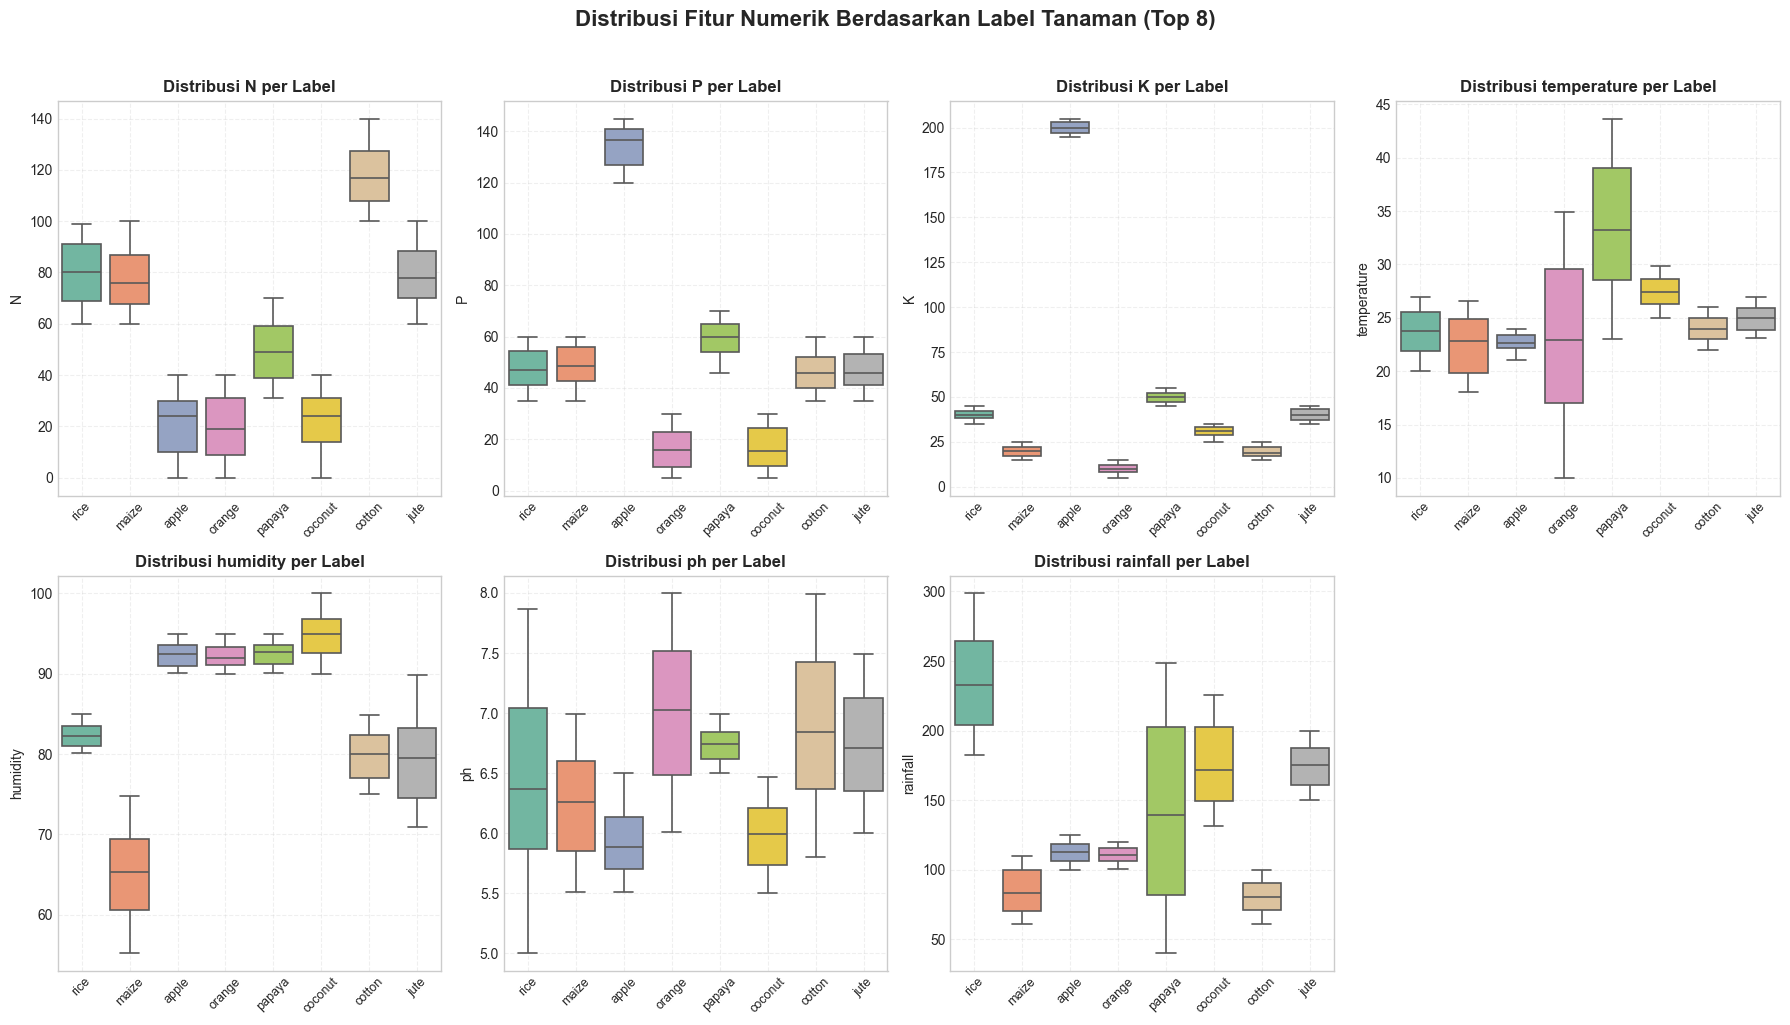

=== INSIGHT DISCRIMINATIVE FEATURES ===
Fitur yang menunjukkan variasi besar antar label:
• N: Variasi rata-rata = 11.78
• P: Variasi rata-rata = 7.71
• K: Variasi rata-rata = 3.11
• temperature: Variasi rata-rata = 2.86


In [42]:
# Distribusi fitur numerik berdasarkan label
fig, axes = plt.subplots(2, 4, figsize=(18, 10))
axes = axes.flatten()

# Pilih subset label untuk readability (top 8)
top_labels = df['label'].value_counts().head(8).index
df_subset = df[df['label'].isin(top_labels)]

for i, feature in enumerate(num_features):
    sns.boxplot(data=df_subset, x='label', y=feature, ax=axes[i], 
                palette='Set2', linewidth=1.2)
    axes[i].set_title(f'Distribusi {feature} per Label', 
                     fontweight='bold', fontsize=12)
    axes[i].tick_params(axis='x', rotation=45, labelsize=9)
    axes[i].grid(True, alpha=0.3, linestyle='--')
    axes[i].set_xlabel('')

# Hide extra subplot jika ada
if len(num_features) < 8:
    axes[7].set_visible(False)

plt.suptitle('Distribusi Fitur Numerik Berdasarkan Label Tanaman (Top 8)', 
             fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

# Insight analysis
print("=== INSIGHT DISCRIMINATIVE FEATURES ===")
print("Fitur yang menunjukkan variasi besar antar label:")
for feature in num_features[:4]:  # Focus on top 4
    feature_var = df_subset.groupby('label')[feature].std().mean()
    print(f"• {feature}: Variasi rata-rata = {feature_var:.2f}")

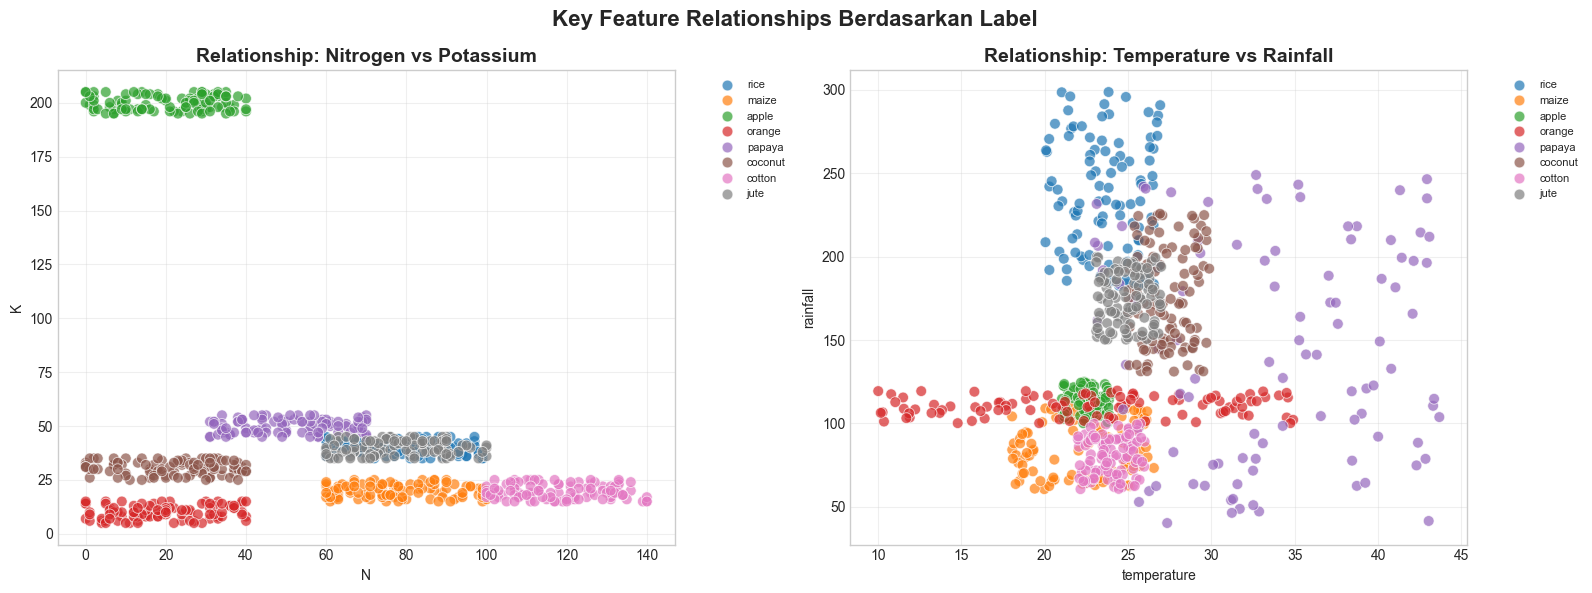


=== SEPARABILITAS KELAS ===
Dari scatterplot terlihat:
• Cluster tanaman dengan kebutuhan nutrisi serupa
• Separasi berdasarkan kondisi iklim yang berbeda
• Potensi fitur diskriminatif untuk klasifikasi


In [43]:
# Scatterplot untuk relationship antar fitur kunci
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: N vs K (Nutrisi tanah)
sns.scatterplot(data=df_subset, x='N', y='K', hue='label', 
                ax=axes[0], alpha=0.7, s=60, palette='tab10')
axes[0].set_title('Relationship: Nitrogen vs Potassium', 
                  fontweight='bold', fontsize=14)
axes[0].grid(True, alpha=0.3)
axes[0].legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8)

# Plot 2: Temperature vs Rainfall (Kondisi iklim)
sns.scatterplot(data=df_subset, x='temperature', y='rainfall', hue='label', 
                ax=axes[1], alpha=0.7, s=60, palette='tab10')
axes[1].set_title('Relationship: Temperature vs Rainfall', 
                  fontweight='bold', fontsize=14)
axes[1].grid(True, alpha=0.3)
axes[1].legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8)

plt.suptitle('Key Feature Relationships Berdasarkan Label', 
             fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# Summary insight
print("\n=== SEPARABILITAS KELAS ===")
print("Dari scatterplot terlihat:")
print("• Cluster tanaman dengan kebutuhan nutrisi serupa")
print("• Separasi berdasarkan kondisi iklim yang berbeda")
print("• Potensi fitur diskriminatif untuk klasifikasi")